In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import *
from statsmodels.graphics.tsaplots import *
from catboost import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.datasets import load_diabetes
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.metrics import *
import pickle
import shap

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, style='whitegrid', palette=palette)  # 解决Seaborn中文显示问题



In [5]:
def getxy():
    targetKey = '货量'
    # 对场地进行编码

    data = pd.read_excel('../原始数据/附件1：物流网络历史货量数据.xlsx')
    df = data[(data['场地1'] == 'DC14') & (data['场地2'] == 'DC10')]
    df.reset_index(inplace=True)

    df['场地1'] = df['场地1'].str.replace('DC', '')
    df['场地1'] = df['场地1'].astype('int64')
    df['场地2'] = df['场地2'].str.replace('DC', '')
    df['场地2'] = df['场地2'].astype('int64')
    df.drop('场地1', axis=1, inplace=True)
    df.drop('场地2', axis=1, inplace=True)

    df['日期'] = pd.to_datetime(df['日期'])
    df['日期'] = df['日期'] - df['日期'].min()
    df['日期'] = df['日期'].apply(lambda x: x.days)
    return df.drop(targetKey, axis=1), df[targetKey]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

-----------[LinearRegression]线性回归-----------


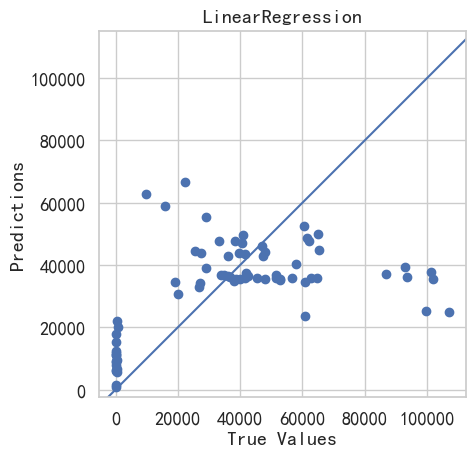

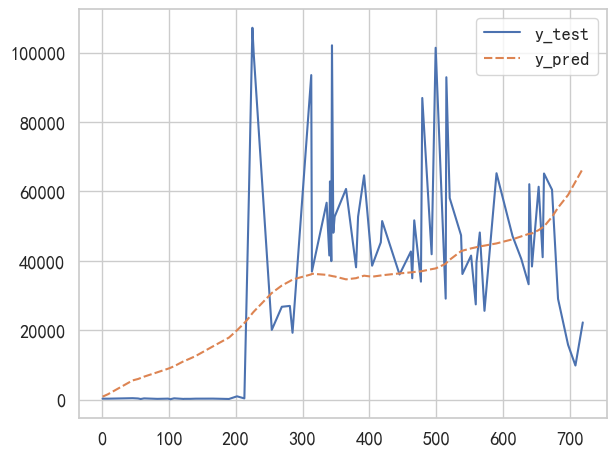

[LinearRegression]线性回归 r2_score: 0.2216837145433952
[LinearRegression]线性回归 mse: 652852266.5094024
[LinearRegression]线性回归 mae: 17628.616344426628
[LinearRegression]线性回归 mape: 11.503027572428662
-----------[Ridge]岭回归-----------


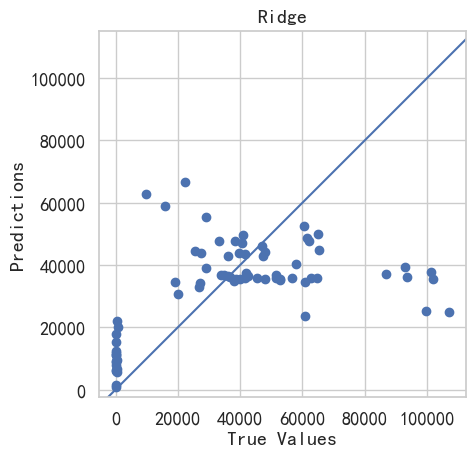

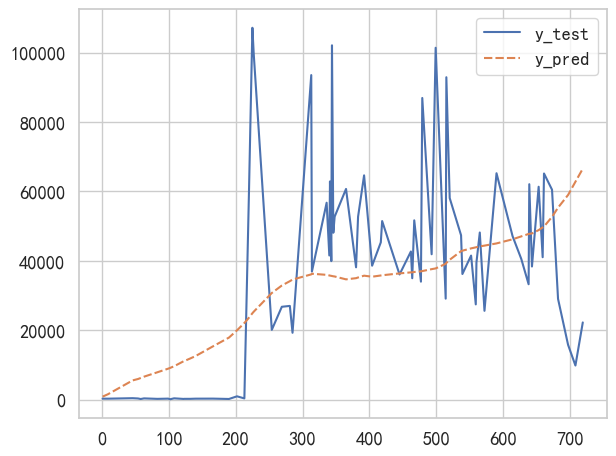

[Ridge]岭回归 r2_score: 0.22168291728889988
[Ridge]岭回归 mse: 652852935.2470531
[Ridge]岭回归 mae: 17628.64306537713
[Ridge]岭回归 mape: 11.503123362820382
-----------[Lasso]套索回归-----------


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+11, tolerance: 5.376e+07


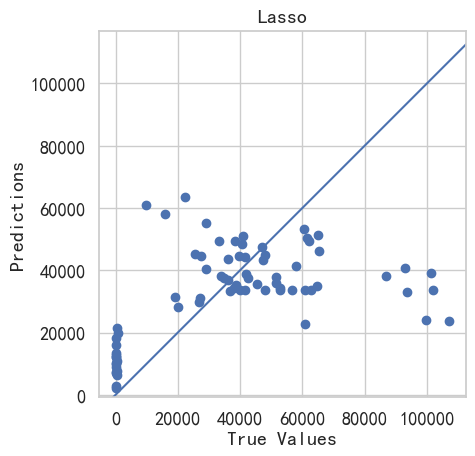

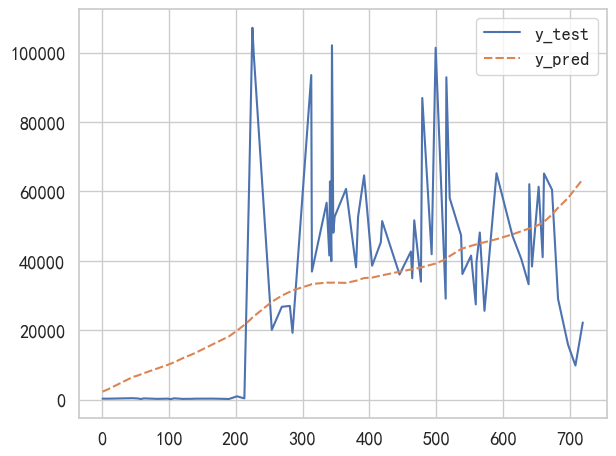

[Lasso]套索回归 r2_score: 0.2107956623944005
[Lasso]套索回归 mse: 661985172.5736428
[Lasso]套索回归 mae: 17937.28483441877
[Lasso]套索回归 mape: 12.584022742402203
-----------[ElasticNet]弹性网络回归-----------


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+11, tolerance: 5.376e+07


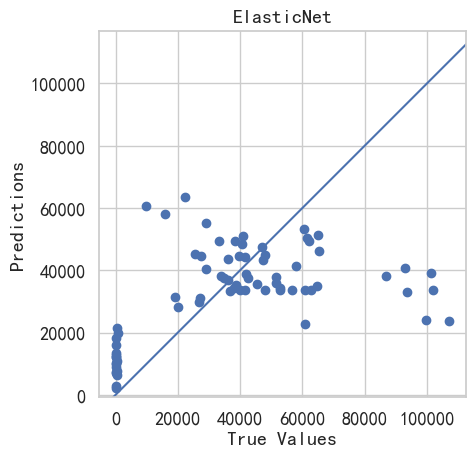

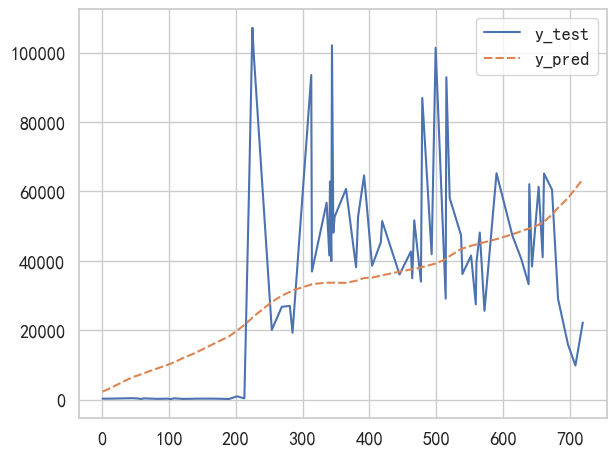

[ElasticNet]弹性网络回归 r2_score: 0.21069985407942649
[ElasticNet]弹性网络回归 mse: 662065536.657949
[ElasticNet]弹性网络回归 mae: 17939.448847402833
[ElasticNet]弹性网络回归 mape: 12.590430395960727
-----------[DecisionTreeRegressor]决策树回归-----------


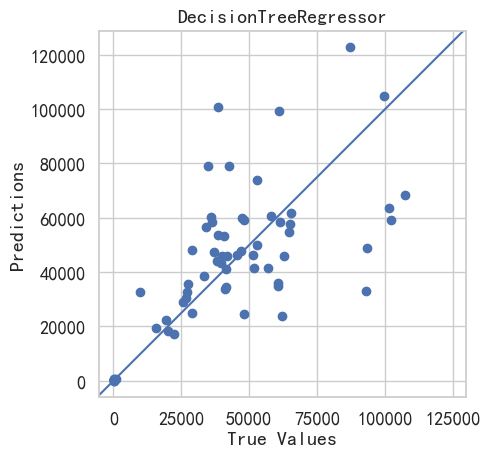

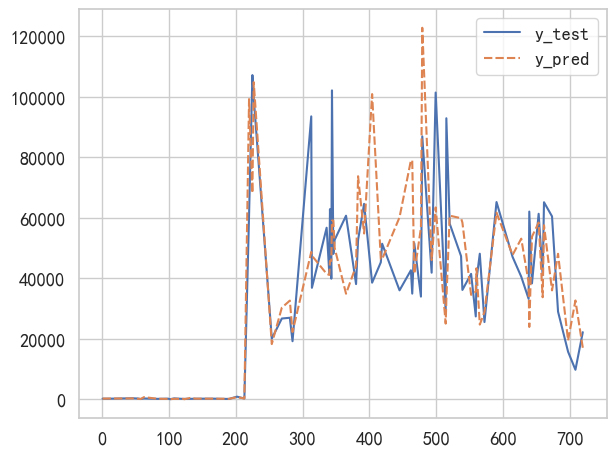

[DecisionTreeRegressor]决策树回归 r2_score: 0.5332783530829351
[DecisionTreeRegressor]决策树回归 mse: 391486457.0
[DecisionTreeRegressor]决策树回归 mae: 12480.17808219178
[DecisionTreeRegressor]决策树回归 mape: 0.35098493166200817
-----------[RandomForestRegressor]随机森林回归-----------


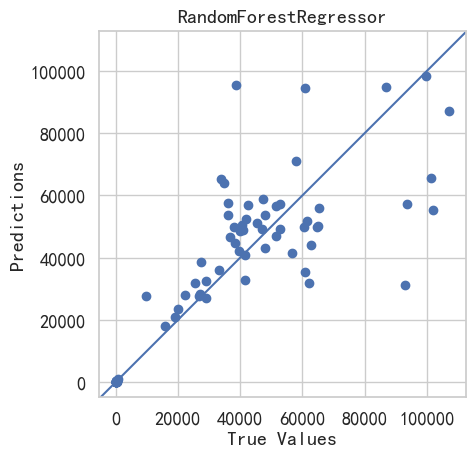

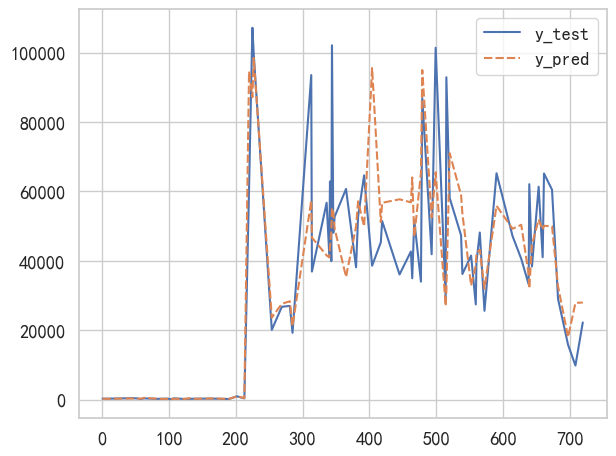

[RandomForestRegressor]随机森林回归 r2_score: 0.6595692263913078
[RandomForestRegressor]随机森林回归 mse: 285553580.5853
[RandomForestRegressor]随机森林回归 mae: 10427.93109589041
[RandomForestRegressor]随机森林回归 mape: 0.28968180397769494
-----------[AdaBoostRegressor]AdaBoost回归-----------


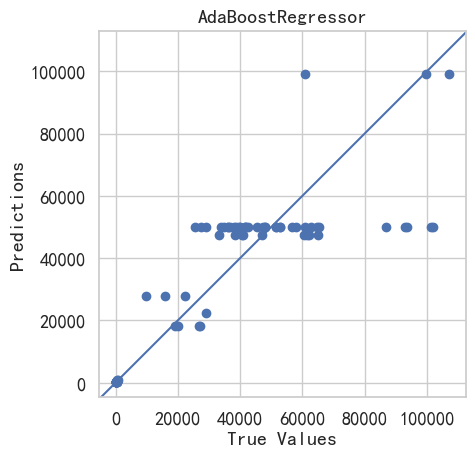

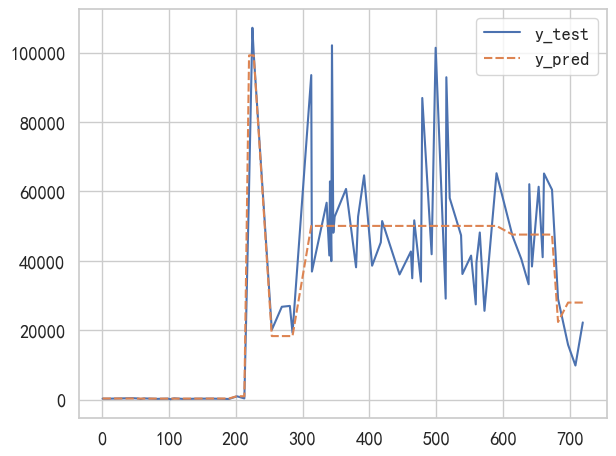

[AdaBoostRegressor]AdaBoost回归 r2_score: 0.7033071256598851
[AdaBoostRegressor]AdaBoost回归 mse: 248866198.85706213
[AdaBoostRegressor]AdaBoost回归 mae: 10116.207615939387
[AdaBoostRegressor]AdaBoost回归 mape: 0.3557605752783187
-----------[GradientBoostingRegressor]梯度提升回归-----------


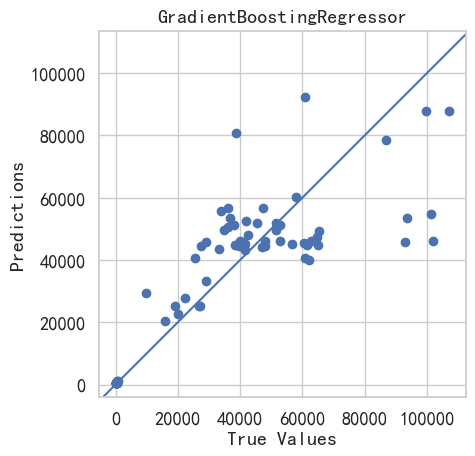

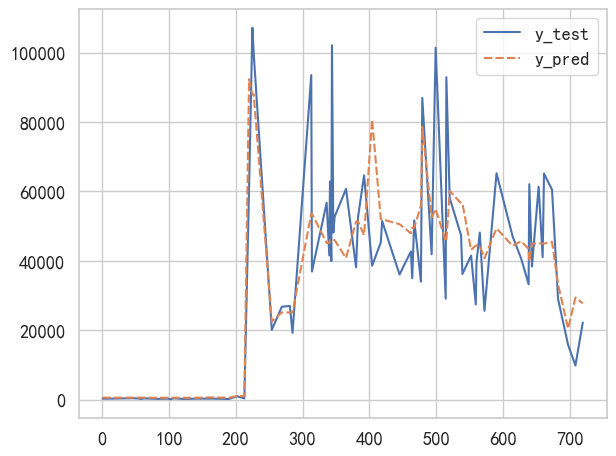

[GradientBoostingRegressor]梯度提升回归 r2_score: 0.69093673488089
[GradientBoostingRegressor]梯度提升回归 mse: 259242491.64263076
[GradientBoostingRegressor]梯度提升回归 mae: 10333.588291983158
[GradientBoostingRegressor]梯度提升回归 mape: 0.6050639171917859
-----------[XGBRegressor]XGBoost回归-----------


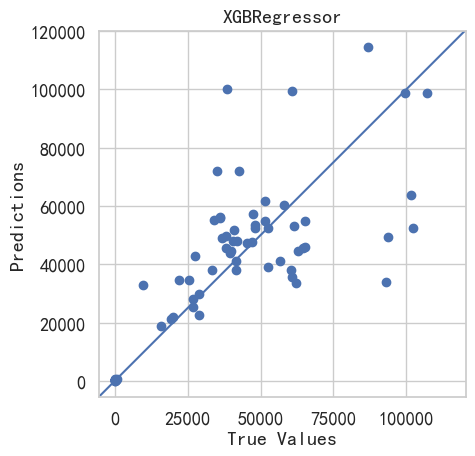

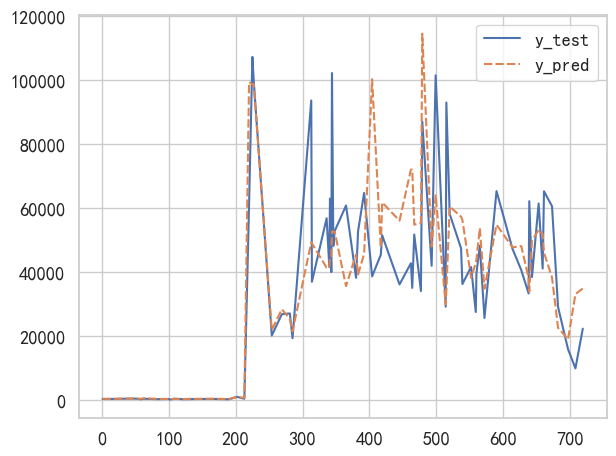

[XGBRegressor]XGBoost回归 r2_score: 0.6012137936969174
[XGBRegressor]XGBoost回归 mse: 334502159.98617876
[XGBRegressor]XGBoost回归 mae: 11298.454302226028
[XGBRegressor]XGBoost回归 mape: 0.3612476812878927
-----------[CatBoostRegressor]CatBoost回归-----------
Learning rate set to 0.038277
0:	learn: 27977.3846047	total: 148ms	remaining: 2m 27s
1:	learn: 27415.3882985	total: 149ms	remaining: 1m 14s
2:	learn: 26820.9616207	total: 150ms	remaining: 49.7s
3:	learn: 26264.1131733	total: 150ms	remaining: 37.5s
4:	learn: 25784.9829706	total: 151ms	remaining: 30.1s
5:	learn: 25278.5283343	total: 152ms	remaining: 25.2s
6:	learn: 24858.2922569	total: 153ms	remaining: 21.7s
7:	learn: 24438.0996664	total: 154ms	remaining: 19.1s
8:	learn: 23979.2497042	total: 155ms	remaining: 17s
9:	learn: 23604.9982951	total: 155ms	remaining: 15.4s
10:	learn: 23162.7651823	total: 156ms	remaining: 14s
11:	learn: 22789.4207357	total: 157ms	remaining: 12.9s
12:	learn: 22472.7334772	total: 158ms	remaining: 12s
13:	learn: 22212.36

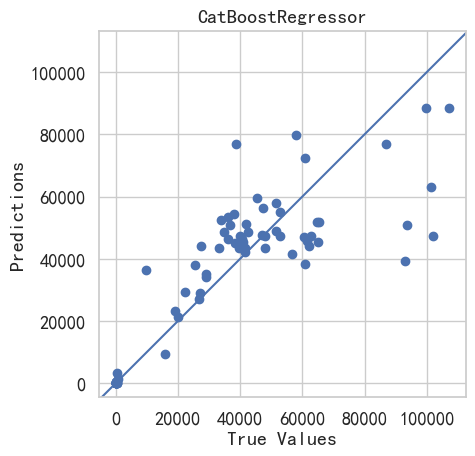

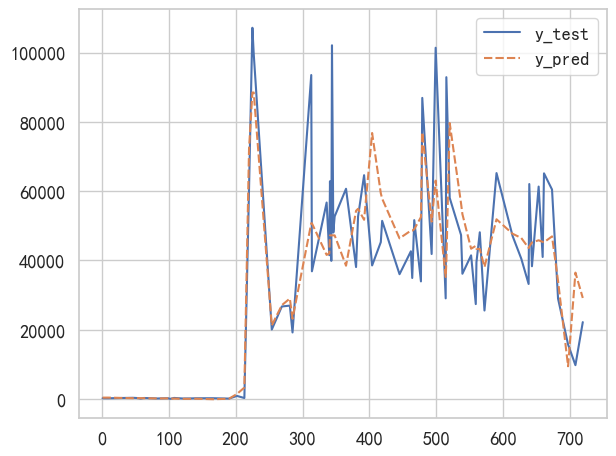

[CatBoostRegressor]CatBoost回归 r2_score: 0.7097128960484883
[CatBoostRegressor]CatBoost回归 mse: 243493033.9945474
[CatBoostRegressor]CatBoost回归 mae: 10036.497048484376
[CatBoostRegressor]CatBoost回归 mape: 0.4789225424972742
-----------[KNeighborsRegressor]K近邻回归-----------


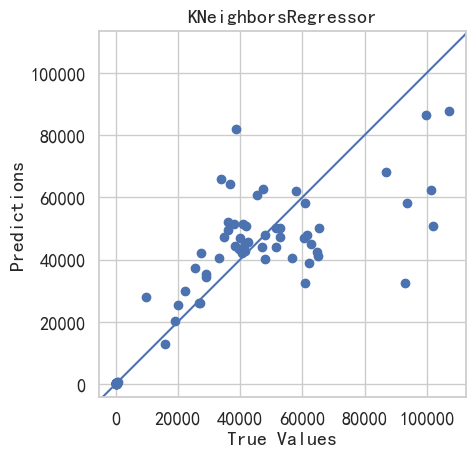

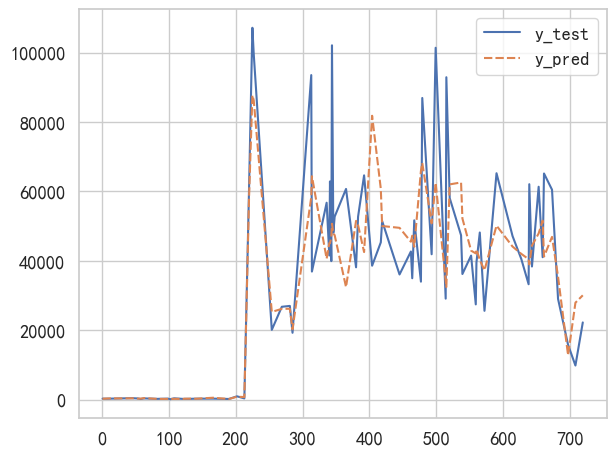

[KNeighborsRegressor]K近邻回归 r2_score: 0.6764919401424452
[KNeighborsRegressor]K近邻回归 mse: 271358795.9786301
[KNeighborsRegressor]K近邻回归 mae: 10446.742465753425
[KNeighborsRegressor]K近邻回归 mape: 0.31171411150077355
-----------[MLPRegressor]多层感知器回归-----------


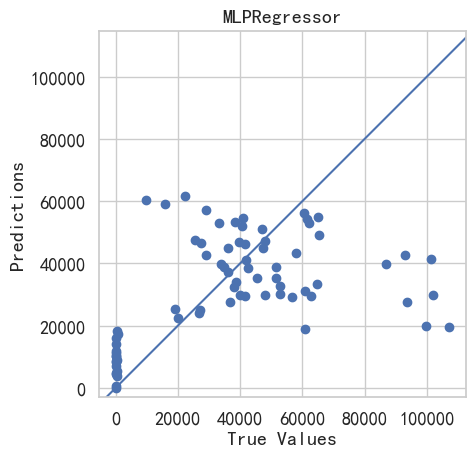

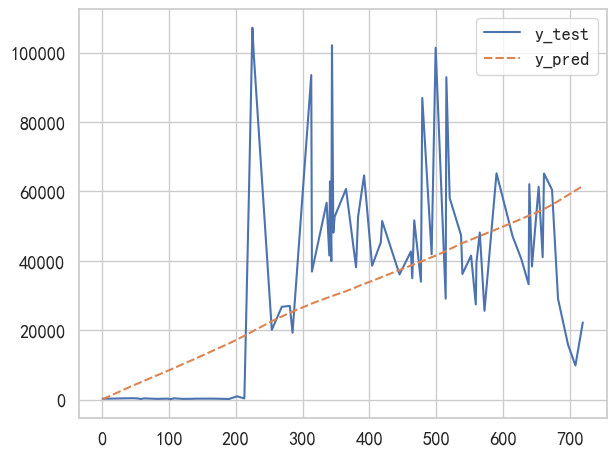

[MLPRegressor]多层感知器回归 r2_score: 0.16560276211504865
[MLPRegressor]多层感知器回归 mse: 699893010.2083126
[MLPRegressor]多层感知器回归 mae: 18073.0157847974
[MLPRegressor]多层感知器回归 mape: 10.340223782561363


In [6]:

X, Y = getxy()

# 获取特征名称
feature_names = X.columns.tolist()

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)  # , random_state=42

alpha_ = 12.8
# 定义回归模型列表
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    # LGBMRegressor(),
    CatBoostRegressor(),
    # SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

modelDict = {
    'LinearRegression': '线性回归',
    'Ridge': '岭回归',
    'Lasso': '套索回归',
    'ElasticNet': '弹性网络回归',
    'DecisionTreeRegressor': '决策树回归',
    'RandomForestRegressor': '随机森林回归',
    'AdaBoostRegressor': 'AdaBoost回归',
    'GradientBoostingRegressor': '梯度提升回归',
    'XGBRegressor': 'XGBoost回归',
    'LGBMRegressor': 'lightgbm回归',
    'CatBoostRegressor': 'CatBoost回归',
    'SVR': '支持向量机回归',
    'KNeighborsRegressor': 'K近邻回归',
    'MLPRegressor': '多层感知器回归'
}

# 对每个模型进行训练和测试，并输出R-squared值
for model in models:
    modelName = type(model).__name__
    title = f'[{modelName}]{modelDict[modelName]}'
    print(f'-----------{title}-----------')
    # if type(models).__name__ == 'LGBMRegressor':
    #     model.fit(X_train, y_train, feature_name=feature_names)
    # else:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # r2 = r2_score(y_test, y_pred)

    # 预测并可视化结果
    plt.scatter(y_test, y_pred)
    plt.title(type(model).__name__)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    # plt.xlim([9e4, 1e5])
    # plt.ylim([9e4, 1e5])
    _ = plt.plot([-1e10, 1e10], [-1e10, 1e10])
    plt.tight_layout()
    # plt.savefig(f'{modelName}.svg')
    plt.show()

    # 图2 - x轴为序号
    df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    sns.lineplot(df)
    plt.tight_layout()
    # plt.savefig(f'{modelName}.svg')
    plt.show()

    # 计算均方误差
    print(title, f'r2_score: {r2_score(y_test, y_pred)}')
    print(title, f'mse: {mean_squared_error(y_test, y_pred)}')
    print(title, f'mae: {mean_absolute_error(y_test, y_pred)}')
    print(title, f'mape: {mean_absolute_percentage_error(y_test, y_pred)}')

    # 保存模型
    with open(f'{modelName}.pkl', 'wb') as f:
        pickle.dump(model, f)

    # if type(model).__name__ == 'CatBoostRegressor':
    #     print('超参数', model.get_all_params())
    #
    #     '''
    #     敏感性分析
    #     '''
    #     explainer = shap.Explainer(model)
    #     shap_values = explainer(X)
    #
    #     plt.figure(figsize=(8, 6))
    #     shap.plots.waterfall(shap_values[0], show=False)
    #     plt.tight_layout()
    #     # plt.savefig('sensitivity-waterfall.svg')
    #     plt.show()
    #
    #     plt.figure(figsize=(8, 6))
    #     shap.plots.bar(shap_values, show=False)
    #     plt.tight_layout()
    #     # plt.savefig('sensitivity-bar.svg')
    #     plt.show()
    #
    #     plt.figure(figsize=(8, 6))
    #     shap.summary_plot(shap_values, X, show=False)
    #     plt.tight_layout()
    #     # plt.savefig('sensitivity-beeswarm.svg')
    #     plt.show()

    # if type(model).__name__ == 'Ridge':
    #     for feature, coef in zip(feature_names, model.coef_):
    #         print(f"{feature}: {coef:.5f}")
    #     print('系数', model.coef_ / alpha_)
